In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn
import tensorflow as tf 

In [4]:
from abcdflow.kernels.kernels import PER,LIN,CONST,WN,SE,RQ
from abcdflow.plots.plotting_utils import get_values

In [3]:
# create data 
X = np.linspace(0,100,100).reshape(-1,1)
X = tf.convert_to_tensor(X, dtype=tf.float64)

#### Generate covariance matrices and sample some function from graussian processes

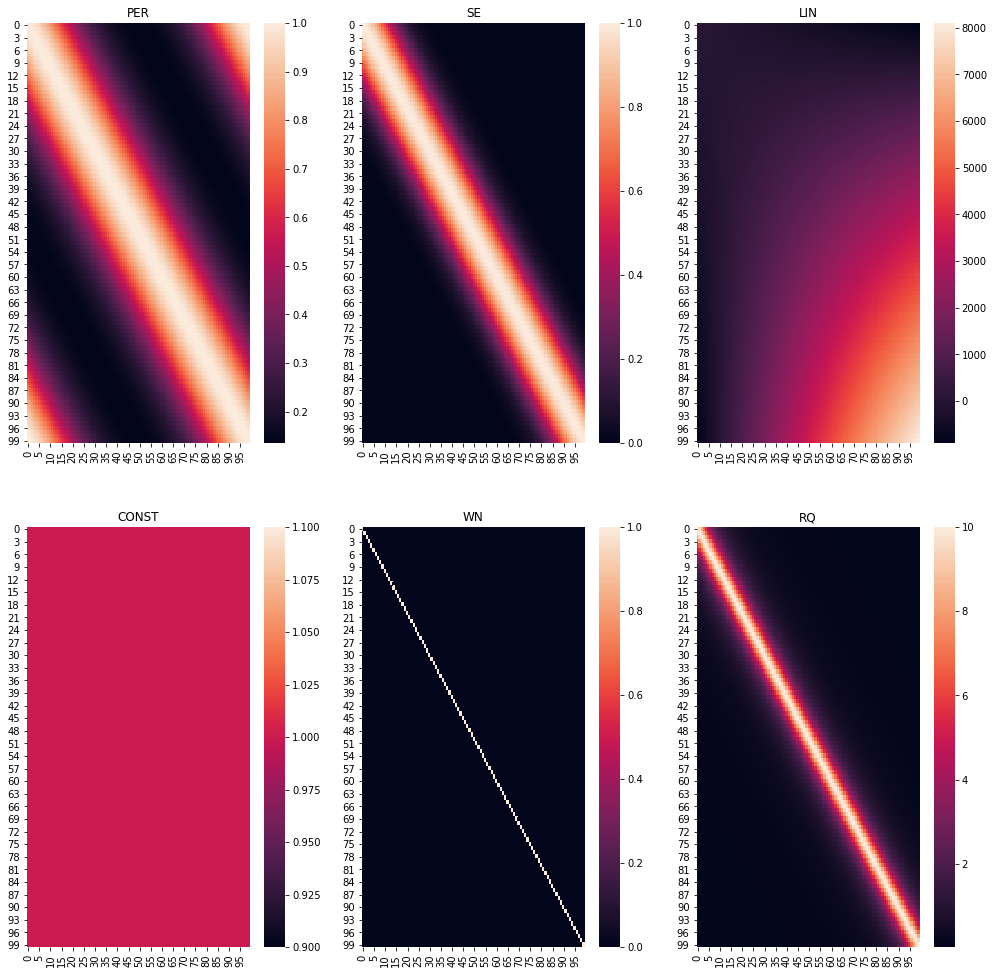

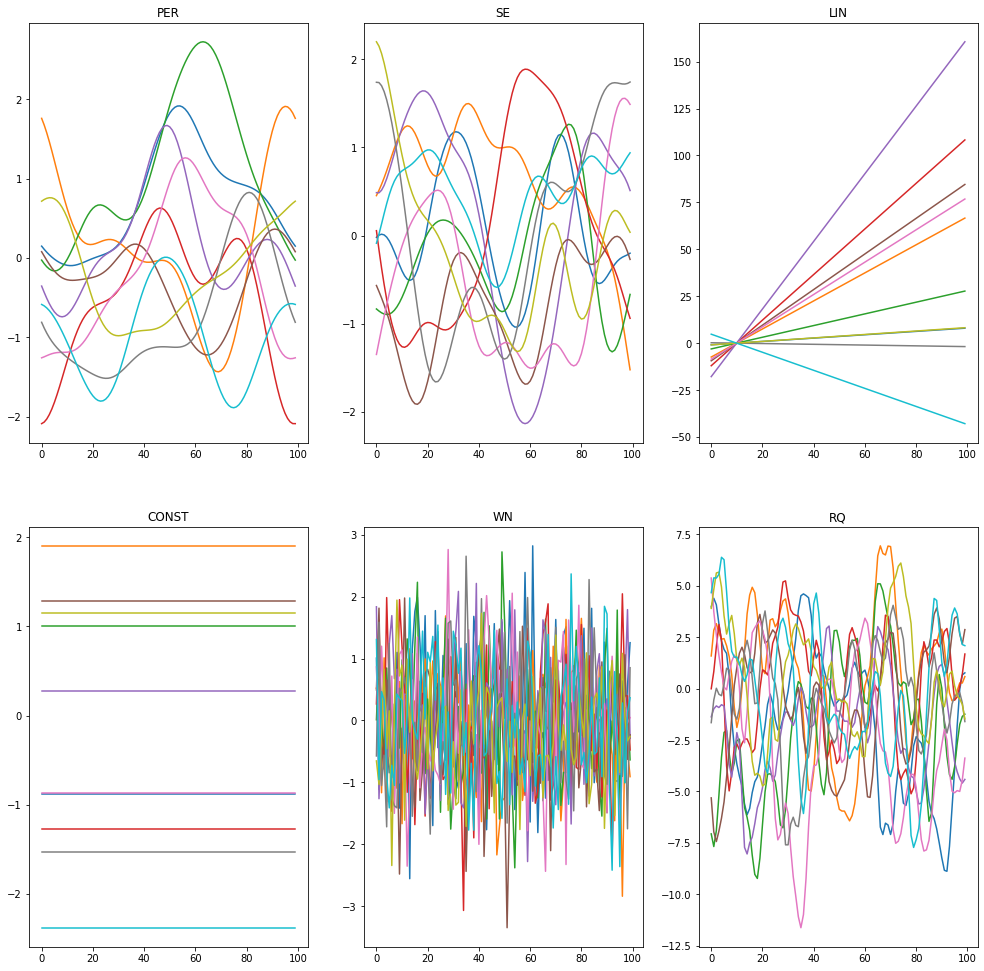

In [30]:
# compute covariance matrices for a different kernels
kernels = [PER,SE,LIN,CONST,WN,RQ]
kernels_parameters = [[1,1,1],[10,1],[10,1],[1],[1],[10,10,1]]
means_by_kernels = []
fig , axes  = plt.subplots(2,3,figsize=(17,17))
for count,(kernel,kernel_param) in enumerate(zip(kernels,kernels_parameters)) :
    cov = kernel(X,X,kernel_param).numpy()
    MEANS = []
    for i in range(10) :
        mean,_,_=get_values(np.zeros((cov.shape[0])),cov,nb_samples=1)
        MEANS.append(mean)
    means_by_kernels.append(MEANS)
    sn.heatmap(cov,ax = axes[count//3][count%3])
    axes[count//3][count%3].set_title(str(kernel.__name__))
plt.show()


# Get some samples from the posterior and plots 
fig , axes  = plt.subplots(2,3,figsize=(17,17))
for count,(mean,kernel) in enumerate(zip(means_by_kernels,kernels)):
    for line in mean :
        axes[count//3][count%3].plot(line)
    axes[count//3][count%3].set_title(str(kernel.__name__))
plt.show()

#### Let's try to model real data 

    -With one kernel

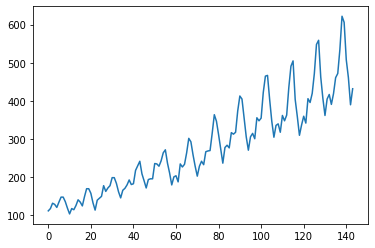

In [5]:
# load signal
Y = np.array(pd.read_csv("./data/periodic.csv")["x"])[:].reshape(-1, 1)
X = np.linspace(0,len(Y),len(Y)).reshape(-1,1)
X_s = np.linspace(0,len(Y)+20,len(Y)+20).reshape(-1, 1)
plt.plot(Y)
plt.show()

In [6]:
# load our training class
from abcdflow.training.trainer import Trainer

In [13]:
training_class = Trainer(X, Y, X_s, straigth=True, GPY=False, do_plot=False, depth=1, verbose=False, initialisation_restart=2, reduce_data=False,
                             experimental_multiprocessing=True, use_changepoint=False, base_kernels=['+PER','+LIN','+CONST','+WN',"+SE","+RQ"])
    
model, kernel = training_class.launch_analysis()

You chooosed straightforward training
This is experimental, the speed may varie a lot !
[STATE]  starting with  [('+PER',), ('+LIN',), ('+CONST',), ('+WN',), ('+SE',), ('+RQ',)]
[INTERMEDIATE RESULTS]  The best model is ['+SE'] at layer 1
[STATE]  The best model is ['+SE'] after swap 

 Parameters of  : ['+SE']
   var name               |               value
   squaredexp_l           |                 [144.]
   squaredexp_sigma       |       [115937.0811446]
   noise                  |        [2021.15036414]


 /home/gregoryscafarto/Bureau/ABCDflow/abcdflow/plots/plotting_utils.py:117: RuntimeWarning:covariance is not positive-semidefinite.


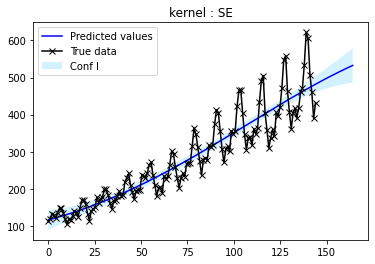

In [14]:
mu,cov = model.predict(X,Y,X_s,kernel)
model.plot(mu,cov,X,Y,X_s,kernel)
plt.show()

    -With multiple kernels

You chooosed straightforward training
This is experimental, the speed may varie a lot !
[STATE]  starting with  [('+PER',), ('+LIN',), ('+SE',)]
[INTERMEDIATE RESULTS]  The best model is ['+SE'] at layer 1
[STATE]  The best model is ['+SE'] after swap 
['+PER', '+LIN', '+SE', '*PER', '*LIN', '*SE']
[STATE]  Next combinaison to try : [('+SE', '+PER'), ('+SE', '+LIN'), ('+SE', '+SE'), ('+SE', '*PER'), ('+SE', '*LIN'), ('+SE', '*SE')]
[INTERMEDIATE RESULTS]  The best model is ['+SE', '*PER'] at layer 2
[STATE]  The best model is ['+SE', '*PER'] after swap 
['+PER', '+LIN', '+SE', '*PER', '*LIN', '*SE', '*PER', '*LIN', '*SE', '*PER', '*LIN', '*SE']
[STATE]  Next combinaison to try : [('+SE', '*PER', '+PER'), ('+SE', '*PER', '+LIN'), ('+SE', '*PER', '+SE'), ('+SE', '*PER', '*PER'), ('+SE', '*PER', '*LIN'), ('+SE', '*PER', '*SE'), ('+SE', '*PER', '*PER'), ('+SE', '*PER', '*LIN'), ('+SE', '*PER', '*SE'), ('+SE', '*PER', '*PER'), ('+SE', '*PER', '*LIN'), ('+SE', '*PER', '*SE')]
Cholesky decomp

 /home/gregoryscafarto/Bureau/ABCDflow/abcdflow/plots/plotting_utils.py:117: RuntimeWarning:covariance is not positive-semidefinite.


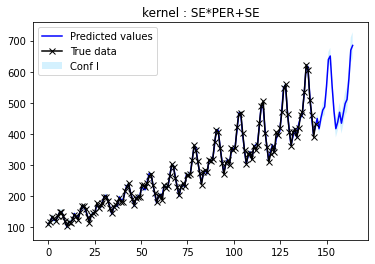

In [16]:
training_class = Trainer(X, Y, X_s, straigth=True, GPY=False, do_plot=True, depth=3, verbose=False, initialisation_restart=10, reduce_data=False,
                             experimental_multiprocessing=True, use_changepoint=False, base_kernels=['+PER','+LIN',"+SE"])
    
model, kernel = training_class.launch_analysis()

    -Using GPY

You chooosed straightforward training
This is experimental, the speed may varie a lot !
[STATE]  starting with  [('+PER',), ('+LIN',), ('+SE',)]
Optimization restart 1/10, f = 808.6995255527447
Optimization restart 1/10, f = 712.9092494479523
Optimization restart 2/10, f = 808.6995255523268
Optimization restart 3/10, f = 808.6995255534501
Optimization restart 2/10, f = 712.9092494595653
Optimization restart 4/10, f = 808.6995255970226
Optimization restart 5/10, f = 808.6995255527572
Optimization restart 3/10, f = 712.909249468968
Optimization restart 6/10, f = 808.6995255555537
Optimization restart 4/10, f = 712.9092504351935Optimization restart 7/10, f = 808.6995255533013

Optimization restart 8/10, f = 808.6995255595605
Optimization restart 5/10, f = 712.9092494492174
Optimization restart 9/10, f = 808.6995255569186
Optimization restart 10/10, f = 808.6995255523718
Optimization restart 6/10, f = 712.909266828142
Optimization restart 7/10, f = 712.9092494511557
Optimization restart 8/

 /home/gregoryscafarto/.local/lib/python3.8/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /home/gregoryscafarto/.local/lib/python3.8/site-packages/GPy/kern/src/stationary.py:213: RuntimeWarning:invalid value encountered in multiply


Optimization restart 10/10, f = 740.3421867941122
[INTERMEDIATE RESULTS]  The best model is ['+SE'] at layer 1
[STATE]  The best model is ['+SE'] after swap 

Name : GP regression
Objective : 712.9092494479523
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  Exponential.variance     |        96478.4833646537  |      +ve      |        
  Exponential.lengthscale  |       170.4620403132341  |      +ve      |        
  Gaussian_noise.variance  |  5.562684646268137e-309  |      +ve      |        


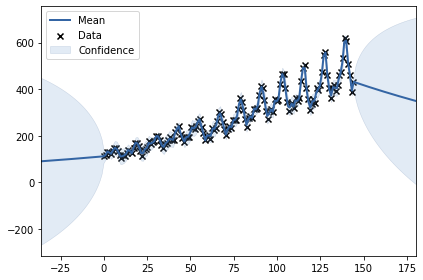

In [17]:
training_class = Trainer(X, Y, X_s, straigth=True, GPY=True, do_plot=True, depth=1, verbose=False, initialisation_restart=10, reduce_data=False,
                             experimental_multiprocessing=True, use_changepoint=False, base_kernels=['+PER','+LIN',"+SE"])
    
model, kernel = training_class.launch_analysis()

You chooosed straightforward training
This is experimental, the speed may varie a lot !
[STATE]  starting with  [('+PER',), ('+LIN',), ('+SE',)]
Optimization restart 1/10, f = 712.9092539124191
Optimization restart 1/10, f = 808.6995255539559
Optimization restart 2/10, f = 808.699525556026
Optimization restart 2/10, f = 712.909249575811
Optimization restart 3/10, f = 808.6995262813291
Optimization restart 1/10, f = 694.596306978272
Optimization restart 4/10, f = 808.6995255638428Optimization restart 3/10, f = 712.909250148651

Optimization restart 5/10, f = 808.6995255540486
Optimization restart 4/10, f = 748.6347325806496
Optimization restart 4/10, f = 712.9093160491218
Optimization restart 3/10, f = 615.8724949465917
Optimization restart 6/10, f = 808.6995255525601
Optimization restart 7/10, f = 808.6995255523249
Optimization restart 5/10, f = 712.9092494473525
Optimization restart 8/10, f = 808.6995255714314
Optimization restart 2/10, f = 712.9092524243084
Optimization restart 9/10,

 /home/gregoryscafarto/.local/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:131: RuntimeWarning:overflow encountered in true_divide
 /home/gregoryscafarto/.local/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:invalid value encountered in sin
 /home/gregoryscafarto/.local/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:148: RuntimeWarning:overflow encountered in true_divide
 /home/gregoryscafarto/.local/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:150: RuntimeWarning:invalid value encountered in sin
 /home/gregoryscafarto/.local/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:invalid value encountered in cos


Optimization restart 8/10, f = 688.5436533631947


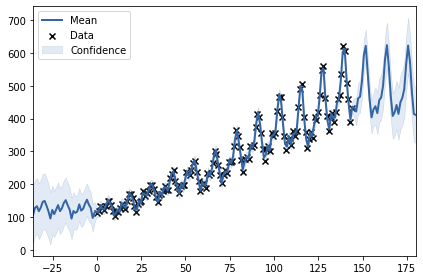

Optimization restart 2/10, f = 869.677016281705
Optimization restart 3/10, f = 762.7609320560866


 /home/gregoryscafarto/.local/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:155: RuntimeWarning:divide by zero encountered in true_divide
 /home/gregoryscafarto/.local/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:155: RuntimeWarning:invalid value encountered in true_divide
 /home/gregoryscafarto/.local/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:168: RuntimeWarning:invalid value encountered in multiply


Optimization restart 4/10, f = 917.6990442962702
Optimization restart 4/10, f = 710.0828146676268
Optimization restart 5/10, f = 928.1461172043771
Optimization restart 9/10, f = 615.9524021861155
Optimization restart 6/10, f = 766.2901036181312
Optimization restart 10/10, f = 710.4020258686679
Optimization restart 7/10, f = 764.7654195962671


 /home/gregoryscafarto/.local/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 5/10, f = 600.7775233082541


 /home/gregoryscafarto/.local/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:overflow encountered in square
 /home/gregoryscafarto/.local/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:151: RuntimeWarning:overflow encountered in square
 /home/gregoryscafarto/.local/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:divide by zero encountered in true_divide
 /home/gregoryscafarto/.local/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:invalid value encountered in multiply
 /home/gregoryscafarto/.local/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:163: RuntimeWarning:invalid value encountered in multiply


Optimization restart 6/10, f = 7283409.457555703
Optimization restart 1/10, f = 711.6015341734239


 /home/gregoryscafarto/.local/lib/python3.8/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /home/gregoryscafarto/.local/lib/python3.8/site-packages/GPy/kern/src/stationary.py:213: RuntimeWarning:invalid value encountered in multiply


Optimization restart 2/10, f = 870.9435112875422
Optimization restart 7/10, f = 700.5488668900177
Optimization restart 8/10, f = 763.5273418496773
Optimization restart 3/10, f = 717.5076380861485
Optimization restart 4/10, f = 754.0725239336597
Optimization restart 9/10, f = 742.2560600678753
Optimization restart 8/10, f = 607.3086276207234
Optimization restart 10/10, f = 764.83635492131
Optimization restart 5/10, f = 691.9178060473371
Optimization restart 9/10, f = 771.1819558752851
Optimization restart 6/10, f = 718.2572935990718
Optimization restart 7/10, f = 712.9102044112658
Optimization restart 10/10, f = 711.0940059598737
Optimization restart 8/10, f = 712.958856422838
Optimization restart 9/10, f = 711.0056592457211
Optimization restart 10/10, f = 714.9111092004139


In [19]:
training_class = Trainer(X, Y, X_s, straigth=True, GPY=True, do_plot=True, depth=2, verbose=False, initialisation_restart=10, reduce_data=False,
                             experimental_multiprocessing=True, use_changepoint=False, base_kernels=['+PER','+LIN',"+SE"])
    
model, kernel = training_class.launch_analysis()

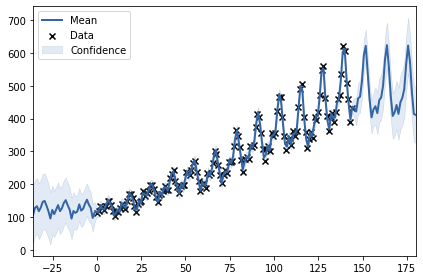

In [20]:
mu,cov = model.predict(X,Y,X_s,kernel)
model.plot(mu,cov,X,Y,X_s,kernel)
plt.show()